<a href="https://colab.research.google.com/github/AkshatMadhani/DeepLearning/blob/main/Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [68]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [69]:
y_train.shape

(50000, 1)

In [70]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [71]:
x_train=x_train/255
x_test=x_test/255

In [72]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [81]:
def plot_sample (x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

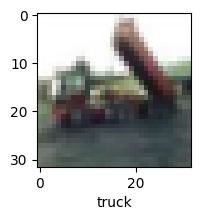

In [74]:
plot_sample(x_train,y_train,2)

In [75]:
cnn= models.Sequential([
    layers.Conv2D(filters=(32),kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3981 - loss: 1.6799
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5715 - loss: 1.2145
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.6146 - loss: 1.0978
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.6465 - loss: 1.0164
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.6685 - loss: 0.9524
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6894 - loss: 0.8940
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.7032 - loss: 0.8522
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.7193 - loss: 0.8023
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 29ms/step - accuracy: 0.7426 - loss: 0.7487
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.7523 - loss: 0.7072


In [78]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6473 - loss: 1.0571


[1.0774290561676025, 0.645799994468689]

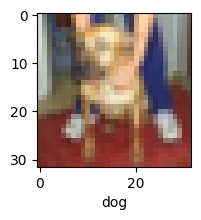

In [88]:
plot_sample(x_train,y_train,51)

In [90]:
classes[cnn.predict(x_train[51].reshape(1,32,32,3)).argmax()]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'dog'